# Data Exploration: 


In [106]:
import warnings
warnings.filterwarnings("ignore")

In [107]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

In [108]:
df=pd.read_csv("Employee.csv")
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [110]:
df.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [111]:
df.shape

(148, 6)

In [112]:
# list down the unique values in each feature and find its length
unique_values = {col: (df[col].dropna().unique(), df[col].nunique()) for col in df.columns}
print(unique_values)

{'Company': (array(['TCS', 'Infosys', 'CTS', 'Tata Consultancy Services', 'Congnizant',
       'Infosys Pvt Lmt'], dtype=object), 6), 'Age': (array([20., 30., 35., 40., 23., 34., 45., 18., 22., 32., 37., 50., 21.,
       46., 36., 26., 41., 24., 25., 43., 19., 38., 51., 31., 44., 33.,
       17.,  0., 54.]), 29), 'Salary': (array([2300., 3000., 4000., 5000., 6000., 7000., 8000., 9000., 1089.,
       1234., 3030., 3045., 3184., 4824., 5835., 7084., 8943., 8345.,
       9284., 9876., 2034., 7654., 2934., 4034., 5034., 8202., 9024.,
       4345., 6544., 6543., 3234., 4324., 5435., 5555., 8787., 3454.,
       5654., 5009., 5098., 3033.]), 40), 'Place': (array(['Chennai', 'Mumbai', 'Calcutta', 'Delhi', 'Podicherry', 'Cochin',
       'Noida', 'Hyderabad', 'Bhopal', 'Nagpur', 'Pune'], dtype=object), 11), 'Country': (array(['India'], dtype=object), 1), 'Gender': (array([0, 1], dtype=int64), 2)}


In [113]:
# Statistical summary of numerical columns
print("Statistical Summary:")
print(df.describe())

Statistical Summary:
              Age       Salary      Gender
count  130.000000   124.000000  148.000000
mean    30.484615  5312.467742    0.222973
std     11.096640  2573.764683    0.417654
min      0.000000  1089.000000    0.000000
25%     22.000000  3030.000000    0.000000
50%     32.500000  5000.000000    0.000000
75%     37.750000  8000.000000    0.000000
max     54.000000  9876.000000    1.000000


In [114]:
# renaming the columns 
new_column_names = {
    "Company": "Company_Name",
    "Place": "City",
    "Country": "Country_Name",
    "Gender": "Gender_Code"
}

# Rename columns in the dataframe
df.rename(columns=new_column_names, inplace=True)
print(df.head())

  Company_Name   Age  Salary      City Country_Name  Gender_Code
0          TCS  20.0     NaN   Chennai        India            0
1      Infosys  30.0     NaN    Mumbai        India            0
2          TCS  35.0  2300.0  Calcutta        India            0
3      Infosys  40.0  3000.0     Delhi        India            0
4          TCS  23.0  4000.0    Mumbai        India            0


# Data Cleaning: 



In [116]:
#To check the null values or missing values in the data set 
df.isnull().sum()

Company_Name     8
Age             18
Salary          24
City            14
Country_Name     0
Gender_Code      0
dtype: int64

In [117]:
# Check Null Value Percentage
null_percentage = (df.isnull().sum() / len(df)) * 100
print("Null Value Percentage:")
print(null_percentage)

Null Value Percentage:
Company_Name     5.405405
Age             12.162162
Salary          16.216216
City             9.459459
Country_Name     0.000000
Gender_Code      0.000000
dtype: float64


In [118]:
# Replace 0 in Age with NaN
df["Age"] = df["Age"].replace(0, np.nan)

# Handling missing values
df["Age"].fillna(df["Age"].median(), inplace=True)  # Median for Age
df["Salary"].fillna(df["Salary"].median(), inplace=True)  # Median for Salary
df["Company_Name"].fillna(df["Company_Name"].mode()[0], inplace=True)  # Mode for Company_Name
df["City"].fillna(df["City"].mode()[0], inplace=True)  # Mode for City
df

,Company_Name,Age,Salary,City,Country_Name,Gender_Code
0,TCS,20.0,5000.0,Chennai,India,0
1,Infosys,30.0,5000.0,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [119]:
df.duplicated().sum()

4

In [120]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [121]:
# Detect outliers using IQR method
Q1 = df[["Age", "Salary"]].quantile(0.25)
Q3 = df[["Age", "Salary"]].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[((df["Age"] < lower_bound["Age"]) | (df["Age"] > upper_bound["Age"])) |
              ((df["Salary"] < lower_bound["Salary"]) | (df["Salary"] > upper_bound["Salary"]))]

df_cleaned = df.copy()  # Keeping a cleaned copy

# Display results
print(df_cleaned.info())
print(df_cleaned.head())
print(outliers)

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 147
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company_Name  144 non-null    object 
 1   Age           144 non-null    float64
 2   Salary        144 non-null    float64
 3   City          144 non-null    object 
 4   Country_Name  144 non-null    object 
 5   Gender_Code   144 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.9+ KB
None
  Company_Name   Age  Salary      City Country_Name  Gender_Code
0          TCS  20.0  5000.0   Chennai        India            0
1      Infosys  30.0  5000.0    Mumbai        India            0
2          TCS  35.0  2300.0  Calcutta        India            0
3      Infosys  40.0  3000.0     Delhi        India            0
4          TCS  23.0  4000.0    Mumbai        India            0
Empty DataFrame
Columns: [Company_Name, Age, Salary, City, Country_Name, Gender_Code]
Index: []


In [122]:
df

,Company_Name,Age,Salary,City,Country_Name,Gender_Code
0,TCS,20.0,5000.0,Chennai,India,0
1,Infosys,30.0,5000.0,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0
143,TCS,33.0,9024.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


# Data Analysis:
Filter the data with age >40 and salary<5000
Plot the chart with age and salary
Count the number of people from each place and represent it visually


   Company_Name   Age  Salary       City Country_Name  Gender_Code
21      Infosys  50.0  3184.0      Delhi        India            0
32      Infosys  45.0  4034.0   Calcutta        India            0
39      Infosys  41.0  3000.0     Mumbai        India            0
50      Infosys  41.0  3000.0    Chennai        India            0
57      Infosys  51.0  3184.0  Hyderabad        India            0


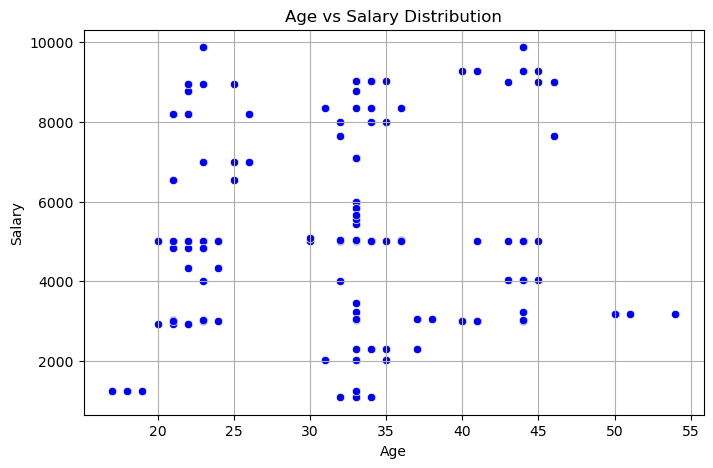

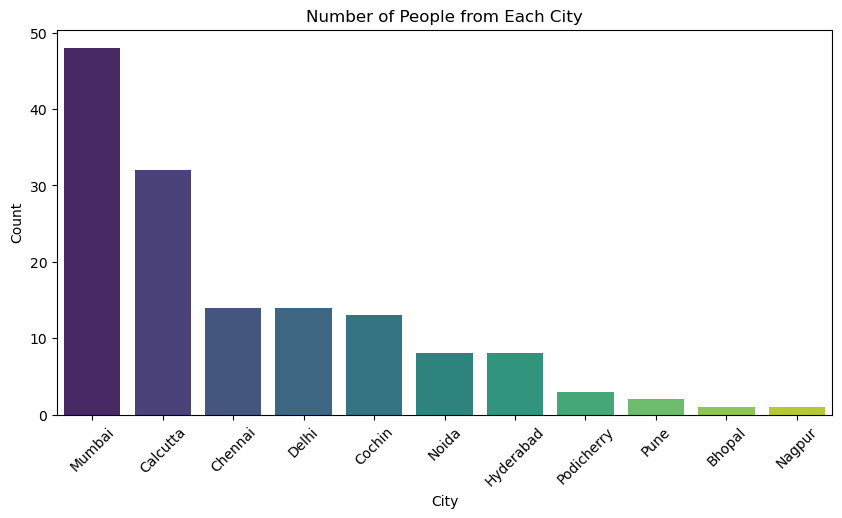

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data with Age > 40 and Salary < 5000
filtered_df = df_cleaned[(df_cleaned["Age"] > 40) & (df_cleaned["Salary"] < 5000)]
print(filtered_df.head())  # Display the first few filtered rows

# Plot Age vs Salary scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_cleaned, x="Age", y="Salary", color="blue")
plt.title("Age vs Salary Distribution")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.grid(True)
plt.show()

# Count people from each place
city_counts = df_cleaned["City"].value_counts()

# Plot bar chart for city-wise count
plt.figure(figsize=(10, 5))
sns.barplot(x=city_counts.index, y=city_counts.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Number of People from Each City")
plt.xlabel("City")
plt.ylabel("Count")
plt.show()


# Data Encoding: 
Convert categorical variables into numerical representations using techniques such as 
one-hot encoding, label encoding, making them suitable for analysis by machine learning algorithms.


In [126]:
# Differentiating Columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Print Results
print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)

Categorical Columns: ['Company_Name', 'City', 'Country_Name']
Numerical Columns: ['Age', 'Salary', 'Gender_Code']


In [127]:
df2=df.copy
df2

<bound method NDFrame.copy of         Company_Name   Age  Salary      City Country_Name  Gender_Code
0                TCS  20.0  5000.0   Chennai        India            0
1            Infosys  30.0  5000.0    Mumbai        India            0
2                TCS  35.0  2300.0  Calcutta        India            0
3            Infosys  40.0  3000.0     Delhi        India            0
4                TCS  23.0  4000.0    Mumbai        India            0
..               ...   ...     ...       ...          ...          ...
142  Infosys Pvt Lmt  22.0  8202.0    Mumbai        India            0
143              TCS  33.0  9024.0  Calcutta        India            1
145          Infosys  44.0  4034.0     Delhi        India            1
146              TCS  33.0  5034.0    Mumbai        India            1
147          Infosys  22.0  8202.0    Cochin        India            0

[144 rows x 6 columns]>

In [128]:
# Label Encoding for categorical columns
label_encoders = {}
categorical_columns = ['Company_Name', 'City', 'Country_Name']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [129]:
df

,Company_Name,Age,Salary,City,Country_Name,Gender_Code
0,4,20.0,5000.0,2,0,0
1,2,30.0,5000.0,6,0,0
2,4,35.0,2300.0,1,0,0
3,2,40.0,3000.0,4,0,0
4,4,23.0,4000.0,6,0,0
...,...,...,...,...,...,...
142,3,22.0,8202.0,6,0,0
143,4,33.0,9024.0,1,0,1
145,2,44.0,4034.0,4,0,1
146,4,33.0,5034.0,6,0,1


In [130]:
# label encoder
# Create a copy of the original DataFrame
df2_label_encoded = df.copy()

# Initialize LabelEncoder for each categorical column
label_Company_Name= LabelEncoder()
label_City = LabelEncoder()
label_Country_Name = LabelEncoder()

# Fit and transform the categorical columns 
df2_label_encoded['Company_Name'] = label_Company_Name.fit_transform(df2_label_encoded['Company_Name'])
df2_label_encoded['City'] = label_City.fit_transform(df2_label_encoded['City'])
df2_label_encoded['Country_Name'] = label_Country_Name.fit_transform(df2_label_encoded['Country_Name'])

print(df2_label_encoded)

     Company_Name   Age  Salary  City  Country_Name  Gender_Code
0               4  20.0  5000.0     2             0            0
1               2  30.0  5000.0     6             0            0
2               4  35.0  2300.0     1             0            0
3               2  40.0  3000.0     4             0            0
4               4  23.0  4000.0     6             0            0
..            ...   ...     ...   ...           ...          ...
142             3  22.0  8202.0     6             0            0
143             4  33.0  9024.0     1             0            1
145             2  44.0  4034.0     4             0            1
146             4  33.0  5034.0     6             0            1
147             2  22.0  8202.0     3             0            0

[144 rows x 6 columns]


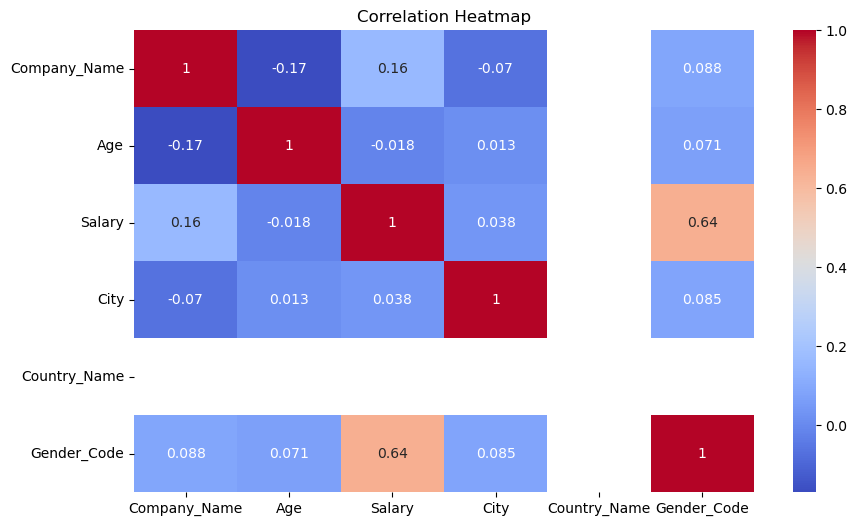

In [131]:

# Compute correlation matrix
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df2_label_encoded.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [132]:
# Correlation with target variable
print(df2_label_encoded.corr()['Salary'].sort_values(ascending=False))

Salary          1.000000
Gender_Code     0.643327
Company_Name    0.162841
City            0.038223
Age            -0.017937
Country_Name         NaN
Name: Salary, dtype: float64


In [133]:
from sklearn.feature_selection import SelectKBest, f_classif
# SelectKBest for feature selection
X = df2_label_encoded.drop(columns=['Salary'])  # Features
y = df2_label_encoded['Salary']  # Target

select_k = SelectKBest(score_func=f_classif, k=3)  # Selecting Top 1 feature, depends on the person
X_selected = select_k.fit_transform(X, y)

print("Selected Features:", X.columns[select_k.get_support()])

Selected Features: Index(['Company_Name', 'Age', 'Gender_Code'], dtype='object')


# Feature Scaling: 
After the process of encoding, perform the scaling of the features using standardscaler and minmaxscaler.


In [135]:
from sklearn.model_selection import train_test_split

In [136]:
#Splitting the Data (80-20% split)
X = df[['Company_Name', 'Age', 'Gender_Code']]  # Features
y = df['Salary']  # Target variable

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining Data (Features):")
print(X_train)
print("\nTesting Data (Features):")
print(X_test)


Training Data (Features):
     Company_Name   Age  Gender_Code
125             4  33.0            1
31              0  20.0            0
99              0  44.0            1
36              4  32.0            0
16              2  23.0            0
..            ...   ...          ...
71              4  34.0            1
107             4  33.0            1
14              2  40.0            0
93              2  54.0            0
103             0  22.0            0

[115 rows x 3 columns]

Testing Data (Features):
     Company_Name   Age  Gender_Code
118             0  22.0            0
19              2  32.0            0
82              0  22.0            0
98              4  33.0            1
56              4  38.0            0
12              0  45.0            0
135             0  40.0            1
65              0  31.0            0
66              0  41.0            0
18              4  22.0            0
51              4  24.0            0
78              4  33.0            

In [138]:
# StandardScaler (Standard Scaling)
scaler_standard = StandardScaler()
X_train_scaled_standard = scaler_standard.fit_transform(X_train)
X_test_scaled_standard = scaler_standard.transform(X_test)

In [139]:
print("\nStandard Scaled Training Data:")
print(X_train_scaled_standard)



Standard Scaled Training Data:
[[ 0.9718699   0.12588645  1.85015592]
 [-1.59744133 -1.42948749 -0.54049499]
 [-1.59744133  1.4419721   1.85015592]
 [ 0.9718699   0.0062423  -0.54049499]
 [-0.31278572 -1.07055504 -0.54049499]
 [-1.59744133 -1.07055504 -0.54049499]
 [ 0.9718699  -1.19019919 -0.54049499]
 [ 0.9718699  -1.19019919 -0.54049499]
 [ 0.9718699   0.12588645 -0.54049499]
 [-1.59744133  0.12588645 -0.54049499]
 [ 0.9718699   0.12588645 -0.54049499]
 [-0.31278572 -1.19019919  1.85015592]
 [ 0.9718699   0.12588645 -0.54049499]
 [ 0.9718699  -1.42948749 -0.54049499]
 [-1.59744133 -1.78841994 -0.54049499]
 [-1.59744133 -1.07055504  1.85015592]
 [ 0.9718699  -0.95091089 -0.54049499]
 [ 0.9718699  -1.30984334 -0.54049499]
 [ 0.9718699   0.12588645  1.85015592]
 [-0.31278572 -1.07055504  1.85015592]
 [-0.31278572  0.12588645 -0.54049499]
 [ 0.9718699   0.12588645  1.85015592]
 [-0.95511352 -1.30984334 -0.54049499]
 [ 0.9718699   0.36517475  1.85015592]
 [ 0.9718699  -1.07055504 -0.540

In [140]:
print(X_train.shape)
print(X_train_scaled_standard.shape)


(115, 3)
(115, 3)


In [141]:
print(len(X_train_scaled_standard[0]))


3
